Analyse des Intervalls (RMSE):

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=50.555, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=45.793, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=45.766, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=148.731, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=47.390, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=47.970, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=48.932, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.600 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=212.228, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=213.700, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=213.336, Time=0.02 sec
 ARIMA(0,1

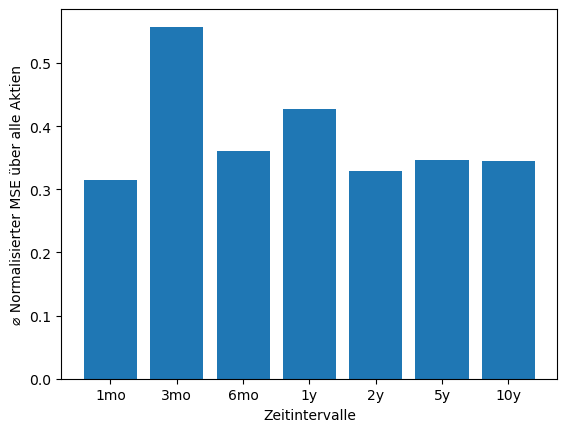


Einzeln pro Zeitintervall:
1mo         0.315110
3mo         0.557616
6mo         0.360416
1y          0.427658
2y          0.328738
5y          0.347264
10y         0.344267


In [17]:
import yfinance as yf
import pandas as pd
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

assets = ["AAPL", "AMZN", "GOOGL", "MSFT"]
intervalls = ["1mo", "3mo", "6mo", "1y", "2y", "5y", "10y"]
results = pd.DataFrame(index=assets, columns=intervalls)

# Durchführen ARIMA für jede Aktie und jedes Intervall
for element in assets:
    for time in intervalls:
        msft = yf.Ticker(element)
        df = msft.history(period=time)
        df = df.reset_index()
        df = df[['Date', 'Close']]
        df['Date'] = pd.to_datetime(df['Date'])
        train = df.iloc[:-10, 1]
        test = df.iloc[-10:, 1]
        model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
        model.fit(train)
        p, d, q = model.order
        test_forecast = model.predict(n_periods=10)
        test_forecast = pd.DataFrame(test_forecast, index=test.index, columns=['Predictions'])
        mse = mean_squared_error(test, test_forecast["Predictions"])
        results.at[element, time] = mse

# Normalisierung der MSE
results_normalized = results.copy()
scaler = MinMaxScaler()
results_normalized[intervalls] = scaler.fit_transform(results[intervalls])

# Berechnung der durchschnittlichen MSE für jedes Intervall
means = results_normalized.mean()

# Plot der durchschnittlichen normalisierten MSE für jedes Zeitintervall
xwerte = intervalls
ywerte = means
plt.bar(xwerte, ywerte)
plt.xlabel("Zeitintervalle")
plt.ylabel("⌀ Normalisierter MSE über alle Aktien")
plt.show()

# Ausgabe der einzelnen normalisierten MSE-Werte für jedes Intervall
print("\nEinzeln pro Zeitintervall:")
for time in intervalls:
    print(f"{time: <12}{means[time]:.6f}")


Analysee des Intervalls (MAPE):

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=50.555, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=45.793, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=45.766, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=148.731, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=47.390, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=47.970, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=48.932, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.526 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=212.228, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=213.700, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=213.336, Time=0.03 sec
 ARIMA(0,1

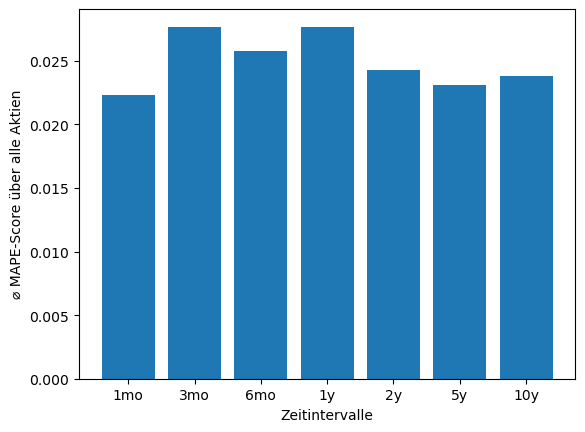

1mo         0.022330
3mo         0.027641
6mo         0.025757
1y          0.027677
2y          0.024278
5y          0.023134
10y         0.023806


In [12]:
import yfinance as yf
import pandas as pd
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error

assets = ["AAPL", "AMZN", "GOOGL", "MSFT"]
intervalls = ["1mo", "3mo", "6mo", "1y", "2y", "5y", "10y"]
means = []
results = pd.DataFrame(index=assets, columns=intervalls)
interval_mape_values = {}  # Dictionary zum Speichern der MAPE-Werte für jedes Intervall

# Durchführen ARIMA für jede Aktie und jedes Intervall
for element in assets:
    for time in intervalls:
        msft = yf.Ticker(element)
        df = msft.history(period=time)
        df = df.reset_index()
        df = df[['Date', 'Close']]
        df['Date'] = pd.to_datetime(df['Date'])
        train = df.iloc[:-10, 1]
        test = df.iloc[-10:, 1]
        model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
        model.fit(train)
        p, d, q = model.order
        test_forecast = model.predict(n_periods=10)
        test_forecast = pd.DataFrame(test_forecast, index=test.index, columns=['Predictions'])
        mape_result = mean_absolute_percentage_error(test, test_forecast["Predictions"])
        results.at[element, time] = mape_result

        # Speichere die MAPE-Werte für jedes Intervall in einem Dictionary
        if time in interval_mape_values:
            interval_mape_values[time].append(mape_result)
        else:
            interval_mape_values[time] = [mape_result]

# Berechnung des durchschnittlichen MAPE-Score für jedes Intervall
for element in results:
    means.append(results[element].mean())

ywerte = means
xwerte = intervalls
plt.bar(xwerte, ywerte)
plt.xlabel("Zeitintervalle")
plt.ylabel("⌀ MAPE-Score über alle Aktien")
plt.show()

# Ausgabe der einzelnen MAPE-Werte für jedes Intervall
print("\nEinzeln pro Zeitintervall:")
for time in intervalls:
    print(f"{time: <12}{np.mean(interval_mape_values[time]):.6f}")
